# <center> Lab 5</center>

Accuracy: 0.98


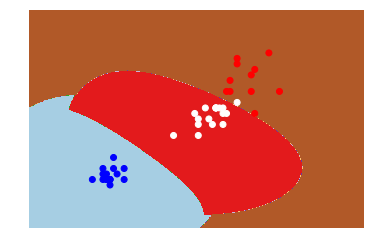

Accuracy: 0.95


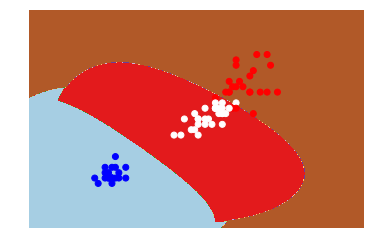

Accuracy: 0.95


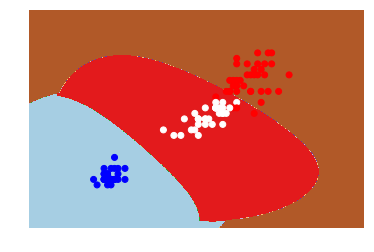

Accuracy: 0.93


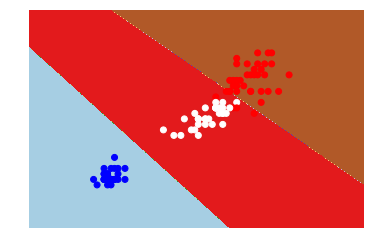

Accuracy: 0.88


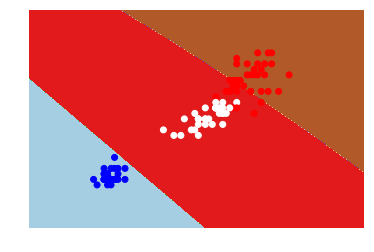

In [9]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

iris = pd.read_csv('data/iris.csv',header=None)

x = iris.iloc[:,[2,3]]
class_le = LabelEncoder()
y = class_le.fit_transform(iris.iloc[:,4].values)

testsize = [0.3,0.5,0.7,0.7,0.7]
kernelname = ['rbf','rbf','rbf','linear','poly']

for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=testsize[i], random_state=0)

    sc = StandardScaler()
    sc.fit(X_train)
    x_std = sc.transform(x)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    svm = SVC(kernel=kernelname[i])
    svm.fit(X_train_std,Y_train)
    y_pred = svm.predict(X_test_std)

    print "Accuracy: %.2f" % accuracy_score(Y_test,y_pred)

    x_std = sc.transform(x)
    x_min, x_max = x_std[:, 0].min() - 1, x_std[:, 0].max() + 1
    y_min, y_max = x_std[:, 1].min() - 1, x_std[:, 1].max() + 1

    h = 0.01

    A, B = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    y_pred = svm.predict(np.c_[A.ravel(), B.ravel()])
    C = y_pred.reshape(A.shape)

    plt.contourf( A , B , C,cmap='Paired')
    plt.axis('off')
    plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c = Y_test,cmap='bwr')
    
    img_name = "svm(" + str(testsize[i]) + str(kernelname[i]) + ").png"
    plt.savefig('img/' + img_name)
    plt.show()
    plt.close("all")

# <center> Lab 6 </center>

In [5]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

wine = pd.read_csv('data/wine.csv',header=None)

x = wine.iloc[:,1::]
class_le = LabelEncoder()
y = class_le.fit_transform(wine.iloc[:,0].values)

# svm
sc = StandardScaler()
sc.fit(x)
x_std = sc.transform(x)
svm = SVC(kernel='rbf')
scores = cross_val_score(svm, x_std, y, cv=10)
print("Accuracy(svm): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Dicision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
scores = cross_val_score(tree, x, y, cv=10)
print("Accuracy(Dicision Tree): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',n_estimators=200,n_jobs=4)
scores = cross_val_score(forest, x, y, cv=10)
print("Accuracy(Random Forest): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2)
scores = cross_val_score(knn,x_std, y, cv=10)
print("Accuracy(KNN): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy(svm): 0.98 (+/- 0.05)
Accuracy(Dicision Tree): 0.91 (+/- 0.14)
Accuracy(Random Forest): 0.98 (+/- 0.05)
Accuracy(KNN): 0.97 (+/- 0.07)


In [2]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

iris = pd.read_csv('data/iris.csv',header=None)
x = iris.iloc[:,[2,3]]
print x

       2    3
0    1.4  0.2
1    1.4  0.2
2    1.3  0.2
3    1.5  0.2
4    1.4  0.2
5    1.7  0.4
6    1.4  0.3
7    1.5  0.2
8    1.4  0.2
9    1.5  0.1
10   1.5  0.2
11   1.6  0.2
12   1.4  0.1
13   1.1  0.1
14   1.2  0.2
15   1.5  0.4
16   1.3  0.4
17   1.4  0.3
18   1.7  0.3
19   1.5  0.3
20   1.7  0.2
21   1.5  0.4
22   1.0  0.2
23   1.7  0.5
24   1.9  0.2
25   1.6  0.2
26   1.6  0.4
27   1.5  0.2
28   1.4  0.2
29   1.6  0.2
..   ...  ...
120  5.7  2.3
121  4.9  2.0
122  6.7  2.0
123  4.9  1.8
124  5.7  2.1
125  6.0  1.8
126  4.8  1.8
127  4.9  1.8
128  5.6  2.1
129  5.8  1.6
130  6.1  1.9
131  6.4  2.0
132  5.6  2.2
133  5.1  1.5
134  5.6  1.4
135  6.1  2.3
136  5.6  2.4
137  5.5  1.8
138  4.8  1.8
139  5.4  2.1
140  5.6  2.4
141  5.1  2.3
142  5.1  1.9
143  5.9  2.3
144  5.7  2.5
145  5.2  2.3
146  5.0  1.9
147  5.2  2.0
148  5.4  2.3
149  5.1  1.8

[150 rows x 2 columns]


In [10]:
print x.tail(10)

       2    3
140  5.6  2.4
141  5.1  2.3
142  5.1  1.9
143  5.9  2.3
144  5.7  2.5
145  5.2  2.3
146  5.0  1.9
147  5.2  2.0
148  5.4  2.3
149  5.1  1.8


In [6]:
class_le = LabelEncoder()
print np.unique(iris.iloc[:, 4])
y = class_le.fit_transform(iris.iloc[:,4].values)
print y

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
